# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19204750,
            "id": 1,
            "last_updated": 1668204878,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 323056628884,
                    "percent_change_1h": 0.654502471755726,
                    "percent_change_24h": -5.52261942728388,
                    "percent_change_7d": -16.7651431481142,
                    "percentage_change_1h": 0.654502471755726,
                    "percentage_change_24h": -5.52261942728388,
                    "percentage_change_7d": -16.7651431481142,
                    "price": 16822.52,
                    "volume_24h": 44902176244
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19204750,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120515078,
            "id": 1027,
            "last_updated": 1668204872,
            "max_supply": 120515078,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 153114783136,
                    "percent_change_1h": 1.10209770744754,
                    "percent_change_24h": -3.90043217892185,
                    "percent_change_7d": -17.1452422966394,
                    "percentage_change_1h": 1.10209770744754,
                    "percentage_change_24h": -3.90043217892185,
                    "percentage_change_7d": -17.1452422966394,
                    "price": 1268.6,
                    "volume_24h": 17233908280
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120515078,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'Current price of BTC: ${btc_price:,}')


Current price of BTC: $16,822.52


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'Current price of ETH: ${eth_price:,}')


Current price of ETH: $1,268.6


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'Current value of your holding in BTC: ${btc_value:,.2f}')


Current value of your holding in BTC: $20,187.02


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'Current value of your holding in ETH: ${eth_value:,.2f}')


Current value of your holding in ETH: $6,723.58


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Current Cryptocurrency wallet balance: ${total_crypto_wallet:,.2f}')


Current Cryptocurrency wallet balance: $26,910.60


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
current_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_current_price = current_prices_df[current_prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
agg_current_price = current_prices_df[current_prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
current_prices_df = pd.concat([spy_current_price, agg_current_price], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
current_prices_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-11-09 05:00:00+00:00  379.93  381.14  373.61  374.13  77996412   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2022-11-09 05:00:00+00:00      589795  377.164224  94.39  94.7001  94.25   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2022-11-09 05:00:00+00:00  94.55  6661375       27653  94.495474

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(current_prices_df['AGG']['close'])

# Print the AGG closing price
print(f'Closing price for AGG: ${agg_close_price:,.2f}')

Closing price for AGG: $94.55


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(current_prices_df['SPY']['close'])

# Print the SPY closing price
print(f'Closing price for SPY: ${spy_close_price:,.2f}')

Closing price for SPY: $374.13


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f'Current value of the bond portfolio: ${agg_value:,.2f}')


Current value of the bond portfolio: $18,910.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f'Current value of the stock portfolio: ${spy_value:,.2f}')


Current value of the stock portfolio: $41,154.30


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds:,.2f}')


Current balance of the stock and bond portion of the portfolio: $60,064.30


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print total value of the member's entire savings portfolio
print(f'Current total value of savings portfolio: ${total_portfolio:,.2f}')


Current total value of savings portfolio: $86,974.90


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[26910.604, 60064.3]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,26910.604
stock/bond,60064.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio composition - 2022-11-09'}, ylabel='amount'>

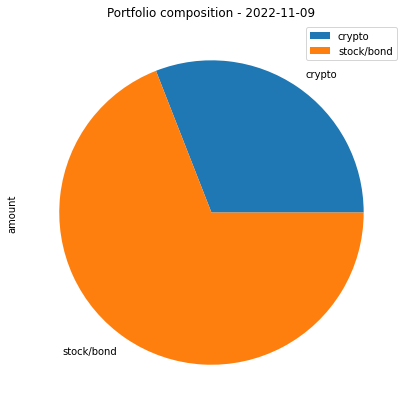

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio composition - 2022-11-09', figsize=(15, 7))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, your account has enough money to fund the emergency portfolio!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, your account you have reached the amount of money needed to start an emergency fund value!')
else:
    print(f'Your portfolio is ${(total_portfolio - emergency_fund_value):.2f} away from reaching the goal of having an emergency fund.')
    
print(f'Current portfolio value: ${total_portfolio:.2f}, emergency fund value needed: ${emergency_fund_value}')

Congratulations, your account has enough money to fund the emergency portfolio!
Current portfolio value: $86974.90, emergency fund value needed: $36000


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
three_years_start_date = pd.Timestamp('2019-11-09', tz='America/New_York').isoformat()
three_years_end_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_years_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=three_years_start_date,
    end=three_years_end_date
).df

# Reorganize the DataFrame
spy_three_years = three_years_prices_df[three_years_prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
agg_three_years = three_years_prices_df[three_years_prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
three_years_prices_df = pd.concat([spy_three_years, agg_three_years], axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(three_years_prices_df.head())
display(three_years_prices_df.tail())


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-11-11 05:00:00+00:00  307.42  308.94  307.27  308.36  36857409   
2019-11-12 05:00:00+00:00  308.75  309.99  307.70  308.96  46487524   
2019-11-13 05:00:00+00:00  307.91  309.54  307.66  309.15  54813789   
2019-11-14 05:00:00+00:00  308.79  309.64  308.09  309.54  52042374   
2019-11-15 05:00:00+00:00  311.02  311.84  310.26  311.81  63017062   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-11-11 05:00:00+00:00      140063  308.174603  111.96  111.9600  111.7800   
2019-11-12 05:00:00+00:00      208796  309.094331  111.92  112.0298  111.8000   
2019-11-13 05:00:00+00:00      258612  308.889742  112.20  112.2300  112.0800   
2019-11-14 05:00:00+00:00      197811  309.154768  112.50  112.5700  112.4337   
2019-11-15 05:00:00+00:00      206158  311.224041  112.46  112.4600  112.3800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-11-11 05:00:00+00:00  111.83  2112221        7718  111.841762  
2019-11-12 05:00:00+00:00  111.95  2032870        9792  111.911632  
2019-11-13 05:00:00+00:00  112.15  2598503        9639  112.162977  
2019-11-14 05:00:00+00:00  112.47  2901272       10744  112.490172  
2019-11-15 05:00:00+00:00  112.41  5578285        9762  112.412397

SPY                                     \
                              open    high     low   close     volume   
timestamp                                                               
2022-11-03 04:00:00+00:00  371.465  374.20  368.79  371.01   85657400   
2022-11-04 04:00:00+00:00  377.000  378.87  370.00  376.35  103253613   
2022-11-07 05:00:00+00:00  377.710  380.57  375.53  379.95   68127819   
2022-11-08 05:00:00+00:00  381.110  385.12  377.72  382.00   84098301   
2022-11-09 05:00:00+00:00  379.930  381.14  373.61  374.13   77996412   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2022-11-03 04:00:00+00:00      641406  372.172239  93.97  94.5050  93.93   
2022-11-04 04:00:00+00:00      703500  374.233909  94.43  94.6400  94.17   
2022-11-07 05:00:00+00:00      478350  378.306760  94.41  94.4600  94.03   
2022-11-08 05:00:00+00:00      598556  381.930966  94.24  94.6099  94.22   
2022-11-09 05:00:00+00:00      589795  377.164224  94.39  94.7001  94.25   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2022-11-03 04:00:00+00:00  94.35  9310830       31297  94.279681  
2022-11-04 04:00:00+00:00  94.34  6889829       22080  94.360954  
2022-11-07 05:00:00+00:00  94.04  7591092       23399  94.152720  
2022-11-08 05:00:00+00:00  94.44  5642274       21092  94.463230  
2022-11-09 05:00:00+00:00  94.55  6661375       27653  94.495474

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_40bonds_60stocks = MCSimulation(
    portfolio_data=three_years_prices_df,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
display(mc_40bonds_60stocks.portfolio_data.head())
display(mc_40bonds_60stocks.portfolio_data.tail())

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-11-11 05:00:00+00:00  307.42  308.94  307.27  308.36  36857409   
2019-11-12 05:00:00+00:00  308.75  309.99  307.70  308.96  46487524   
2019-11-13 05:00:00+00:00  307.91  309.54  307.66  309.15  54813789   
2019-11-14 05:00:00+00:00  308.79  309.64  308.09  309.54  52042374   
2019-11-15 05:00:00+00:00  311.02  311.84  310.26  311.81  63017062   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-11-11 05:00:00+00:00      140063  308.174603          NaN  111.96   
2019-11-12 05:00:00+00:00      208796  309.094331     0.001946  111.92   
2019-11-13 05:00:00+00:00      258612  308.889742     0.000615  112.20   
2019-11-14 05:00:00+00:00      197811  309.154768     0.001262  112.50   
2019-11-15 05:00:00+00:00      206158  311.224041     0.007333  112.46   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-11-11 05:00:00+00:00  111.9600  111.7800  111.83  2112221        7718   
2019-11-12 05:00:00+00:00  112.0298  111.8000  111.95  2032870        9792   
2019-11-13 05:00:00+00:00  112.2300  112.0800  112.15  2598503        9639   
2019-11-14 05:00:00+00:00  112.5700  112.4337  112.47  2901272       10744   
2019-11-15 05:00:00+00:00  112.4600  112.3800  112.41  5578285        9762   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-11-11 05:00:00+00:00  111.841762          NaN  
2019-11-12 05:00:00+00:00  111.911632     0.001073  
2019-11-13 05:00:00+00:00  112.162977     0.001787  
2019-11-14 05:00:00+00:00  112.490172     0.002853  
2019-11-15 05:00:00+00:00  112.412397    -0.000533

SPY                                     \
                              open    high     low   close     volume   
timestamp                                                               
2022-11-03 04:00:00+00:00  371.465  374.20  368.79  371.01   85657400   
2022-11-04 04:00:00+00:00  377.000  378.87  370.00  376.35  103253613   
2022-11-07 05:00:00+00:00  377.710  380.57  375.53  379.95   68127819   
2022-11-08 05:00:00+00:00  381.110  385.12  377.72  382.00   84098301   
2022-11-09 05:00:00+00:00  379.930  381.14  373.61  374.13   77996412   

                                                                  AGG  \
                          trade_count        vwap daily_return   open   
timestamp                                                               
2022-11-03 04:00:00+00:00      641406  372.172239    -0.010297  93.97   
2022-11-04 04:00:00+00:00      703500  374.233909     0.014393  94.43   
2022-11-07 05:00:00+00:00      478350  378.306760     0.009566  94.41   
2022-11-08 05:00:00+00:00      598556  381.930966     0.005395  94.24   
2022-11-09 05:00:00+00:00      589795  377.164224    -0.020602  94.39   

                                                                       \
                              high    low  close   volume trade_count   
timestamp                                                               
2022-11-03 04:00:00+00:00  94.5050  93.93  94.35  9310830       31297   
2022-11-04 04:00:00+00:00  94.6400  94.17  94.34  6889829       22080   
2022-11-07 05:00:00+00:00  94.4600  94.03  94.04  7591092       23399   
2022-11-08 05:00:00+00:00  94.6099  94.22  94.44  5642274       21092   
2022-11-09 05:00:00+00:00  94.7001  94.25  94.55  6661375       27653   

                                                   
                                vwap daily_return  
timestamp                                          
2022-11-03 04:00:00+00:00  94.279681    -0.003696  
2022-11-04 04:00:00+00:00  94.360954    -0.000106  
2022-11-07 05:00:00+00:00  94.152720    -0.003180  
2022-11-08 05:00:00+00:00  94.463230     0.004254  
2022-11-09 05:00:00+00:00  94.495474     0.001165

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_40bonds_60stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ethansilvas/Projects/financial-planning-forecaster/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986883,0.990258,1.004619,1.001645,1.011746,1.012792,0.992467,1.006436,0.996310,1.001839,...,1.003499,0.994377,0.993601,0.996640,0.990471,1.001802,1.005419,1.005597,0.996435,1.011597
2,0.975042,0.993177,0.999696,0.986293,1.006437,0.993225,0.973555,0.998379,0.997942,1.002733,...,1.010064,0.974152,0.991156,1.014598,0.979951,1.013536,1.013188,1.007861,1.005906,1.006452
3,0.982702,1.001204,0.996462,0.983197,1.012448,0.996599,0.971036,0.984810,1.002071,1.017067,...,1.010520,0.977212,0.983512,1.015298,0.979441,1.015281,1.001346,1.007835,0.991740,1.003648
4,0.978178,1.024683,0.988383,0.988677,0.998596,0.997665,0.970370,0.988319,0.991561,1.014556,...,0.995991,0.991459,0.994088,1.015417,0.978860,0.999076,0.981512,1.025896,1.004130,1.001665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.520794,1.162495,0.595608,4.124643,0.588527,4.473828,1.828811,5.785115,1.185207,1.907543,...,1.587396,3.459852,4.597325,1.167852,2.336504,0.163142,1.423373,6.741270,17.789147,1.730986
7557,1.532730,1.158499,0.593830,4.118876,0.586426,4.493149,1.837536,5.860271,1.180967,1.909829,...,1.566464,3.468898,4.550768,1.159996,2.347736,0.161816,1.426710,6.937618,17.752775,1.720879
7558,1.534311,1.146681,0.583877,4.026119,0.588062,4.496553,1.815675,5.834381,1.187454,1.916475,...,1.581370,3.456488,4.598278,1.156746,2.344331,0.161786,1.427361,6.922617,17.715486,1.746157
7559,1.534267,1.144322,0.579279,4.041334,0.592930,4.525968,1.818006,5.833361,1.199986,1.904132,...,1.564760,3.465227,4.584208,1.160321,2.366106,0.161739,1.424595,6.909666,17.790253,1.740727


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

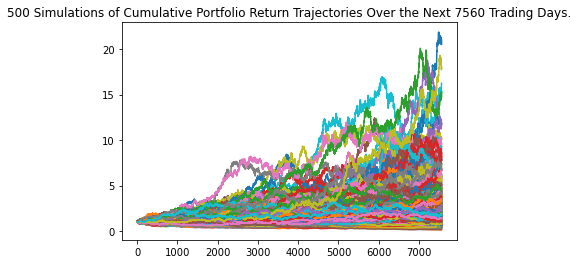

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_40bonds_60stocks.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

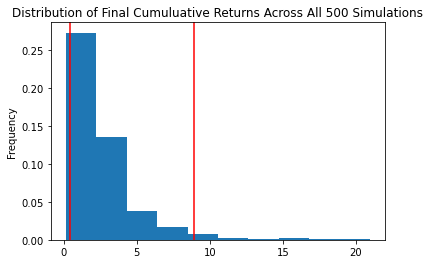

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_40bonds_60stocks.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mc_30y_summary = mc_40bonds_60stocks.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
mc_30y_summary

count           500.000000
mean              2.662534
std               2.477367
min               0.129600
25%               1.186041
50%               1.898179
75%               3.318851
max              20.990251
95% CI Lower      0.432105
95% CI Upper      8.945208
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds:.2f}')

Current balance of the stock and bond portion of the portfolio: $60064.30


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_30y_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_30y_summary[9] * total_stocks_bonds

# Print the result of your calculations
print(f'There is a 95% chance that with the current ${total_stocks_bonds:.2f} in the portfolio'
      f' with a 60% stocks and 40% bonds split over the next 30 years will end within the range of'
      f' ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.')


There is a 95% chance that with the current $60064.30 in the portfolio with a 60% stocks and 40% bonds split over the next 30 years will end within the range of $25,954.06 and $537,287.65.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_20bonds_80stocks = MCSimulation(
    portfolio_data=three_years_prices_df,
    weights=[.80, .20],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
mc_20bonds_80stocks.portfolio_data.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-11-11 05:00:00+00:00  307.42  308.94  307.27  308.36  36857409   
2019-11-12 05:00:00+00:00  308.75  309.99  307.70  308.96  46487524   
2019-11-13 05:00:00+00:00  307.91  309.54  307.66  309.15  54813789   
2019-11-14 05:00:00+00:00  308.79  309.64  308.09  309.54  52042374   
2019-11-15 05:00:00+00:00  311.02  311.84  310.26  311.81  63017062   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-11-11 05:00:00+00:00      140063  308.174603          NaN  111.96   
2019-11-12 05:00:00+00:00      208796  309.094331     0.001946  111.92   
2019-11-13 05:00:00+00:00      258612  308.889742     0.000615  112.20   
2019-11-14 05:00:00+00:00      197811  309.154768     0.001262  112.50   
2019-11-15 05:00:00+00:00      206158  311.224041     0.007333  112.46   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-11-11 05:00:00+00:00  111.9600  111.7800  111.83  2112221        7718   
2019-11-12 05:00:00+00:00  112.0298  111.8000  111.95  2032870        9792   
2019-11-13 05:00:00+00:00  112.2300  112.0800  112.15  2598503        9639   
2019-11-14 05:00:00+00:00  112.5700  112.4337  112.47  2901272       10744   
2019-11-15 05:00:00+00:00  112.4600  112.3800  112.41  5578285        9762   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-11-11 05:00:00+00:00  111.841762          NaN  
2019-11-12 05:00:00+00:00  111.911632     0.001073  
2019-11-13 05:00:00+00:00  112.162977     0.001787  
2019-11-14 05:00:00+00:00  112.490172     0.002853  
2019-11-15 05:00:00+00:00  112.412397    -0.000533

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_20bonds_80stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ethansilvas/Projects/financial-planning-forecaster/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013057,0.992907,0.995376,0.997262,0.991806,1.007607,1.014212,0.981282,1.008617,0.989154,...,1.002843,1.002809,1.022729,0.979578,1.003311,1.029159,1.006192,1.004758,1.005063,0.977513
2,1.041291,1.003117,0.971599,0.995456,1.003078,1.009129,1.018450,0.961751,1.008968,0.971768,...,1.012087,1.025050,1.031022,0.992809,0.998019,1.028041,1.008273,0.979183,0.997583,0.956231
3,1.033175,0.995918,0.962960,1.025338,0.990487,1.011837,1.032728,0.967329,1.001404,0.964961,...,1.001868,0.995035,1.016648,0.972384,0.989883,1.021722,1.016181,0.980320,0.990646,0.943236
4,1.058458,0.999095,0.957477,1.065050,0.982402,1.031188,1.034293,0.979064,1.014528,0.980024,...,1.032288,0.973846,1.017324,0.982659,0.990437,1.016201,1.028496,0.979520,1.001466,0.924606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.090736,3.178240,0.488123,1.002305,1.938367,0.586809,0.718855,2.021495,1.894625,1.434695,...,1.591713,2.021965,1.339771,1.269407,1.096913,2.916806,1.769369,0.514418,1.178262,0.809638
2517,1.077589,3.272339,0.498929,1.035835,1.925576,0.585734,0.730470,2.055589,1.851002,1.417455,...,1.601483,2.025389,1.353652,1.276528,1.125662,2.878956,1.753357,0.509399,1.181707,0.815205
2518,1.060183,3.317145,0.503990,1.023851,1.916890,0.583835,0.722389,1.996690,1.847264,1.396633,...,1.584172,2.056461,1.379031,1.252418,1.132890,2.903834,1.714280,0.521414,1.187221,0.801740
2519,1.049001,3.348294,0.499728,1.029189,1.920679,0.583383,0.695210,2.008434,1.854918,1.388350,...,1.597086,2.117140,1.391155,1.263484,1.131693,2.912222,1.738128,0.521633,1.165306,0.803345


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

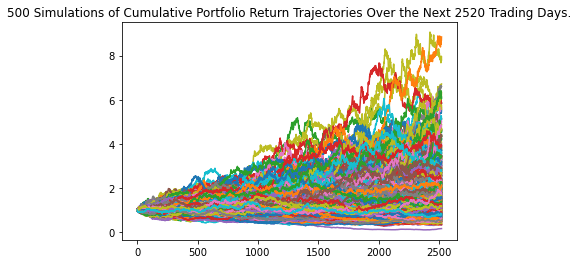

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_20bonds_80stocks.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

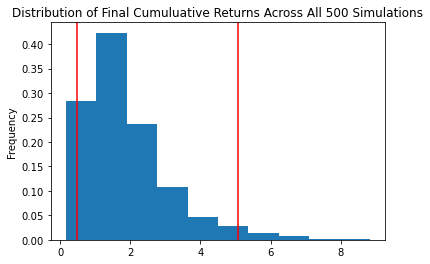

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_20bonds_80stocks.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mc_10y_summary = mc_20bonds_80stocks.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
mc_10y_summary

count           500.000000
mean              1.871123
std               1.223127
min               0.154567
25%               1.036258
50%               1.537257
75%               2.341807
max               8.843963
95% CI Lower      0.481456
95% CI Upper      5.074519
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds:.2f}')

Current balance of the stock and bond portion of the portfolio: $60064.30


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_10y_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_10y_summary[9] * total_stocks_bonds

# Print the result of your calculations
print(f'There is a 95% chance that with the current ${total_stocks_bonds:.2f} in the portfolio'
      f' with a 80% stocks and 20% bonds split over the next 10 years will end within the range of'
      f' ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.')


There is a 95% chance that with the current $60064.30 in the portfolio with a 80% stocks and 20% bonds split over the next 10 years will end within the range of $28,918.34 and $304,797.43.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** With data from the last 3 years, no the credit union members will not be able to retire after only 10 years. One point to note though is that the 3 years of data is from 2019-2022 which is some of the worst economic years for the market as a whole. Since it includes mostly Covid-19 impacted data, our predictions will likely be more pessimistic than if we were to include say 10 years of data. Either way, the upper bounds of the 95% confidence interval are way too low for members to retire in 10 years. The upper bounds for 30 years were better, but still not as good as members would probably want.   